<a href="https://colab.research.google.com/github/kisozinov/NLP_Mag_24/blob/master/%D0%9C%D0%B0%D0%B3%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0_2_%D0%BA%D1%83%D1%80%D1%81_NLP_%D0%9B%D0%B0%D0%B1%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

Выполнили студенты группы 23ИАД:
* Касьянов Никита
* Созинов Кирилл

Окружение

In [ ]:
%pip install -r requirements.txt

**Dataset**: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data

Если вы в коллабе, то запустите ядро с GPU и положите на диск датасет

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = "/content/drive/MyDrive/NLP_Lab1/data/train.txt"
test_path = "/content/drive/MyDrive/NLP_Lab1/data/test.txt"

Mounted at /content/drive


Иначе, в папке `lab1/data` лежат данные, запустите ячейку ниже

In [1]:
train_path = "data/train.txt"
test_path = "data/test.txt"



---



In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
plt.style.use('seaborn-v0_8')

In [4]:
def read_data(data_path):
    texts = []
    labels = []
    with open(data_path) as f:
        for line in f.readlines():
            text, label = line.split(';')
            texts.append(text)
            labels.append(label.strip())

    return texts, labels

In [5]:
train_texts, train_labels = read_data(train_path)
test_texts, test_labels = read_data(test_path)

Считали train и test данные из файлов.

In [6]:
train_texts[:3], train_labels[:3]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 ['sadness', 'sadness', 'anger'])

## EDA

In [ ]:
len(train_texts), len(test_texts)

(16000, 2000)

В train содержится 16000 предложений, в test - 2000

In [ ]:
np.unique(train_labels)

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

Классификация будет выполнятся на 6 классов: ***anger, fear, joy, love, sadness, surprise***.

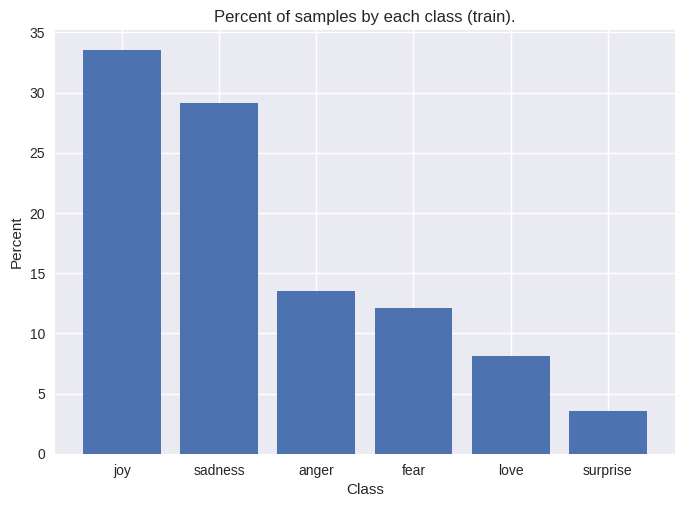

In [ ]:
labels, value_counts = np.unique(train_labels, return_counts=True)
value_percent = [round(value/np.sum(value_counts), 4)*100 for value in value_counts]

df = pd.DataFrame({
    "label": labels,
    "count": value_counts,
    "percent": value_percent
}).sort_values('percent', ascending=False)

plt.xlabel("Class")
plt.ylabel("Percent")
plt.title("Percent of samples by each class (train).")
plt.bar(df['label'], df['percent'])
plt.show()

In [ ]:
df

,label,count,percent
2,joy,5362,33.51
4,sadness,4666,29.16
0,anger,2159,13.49
1,fear,1937,12.11
3,love,1304,8.15
5,surprise,572,3.57


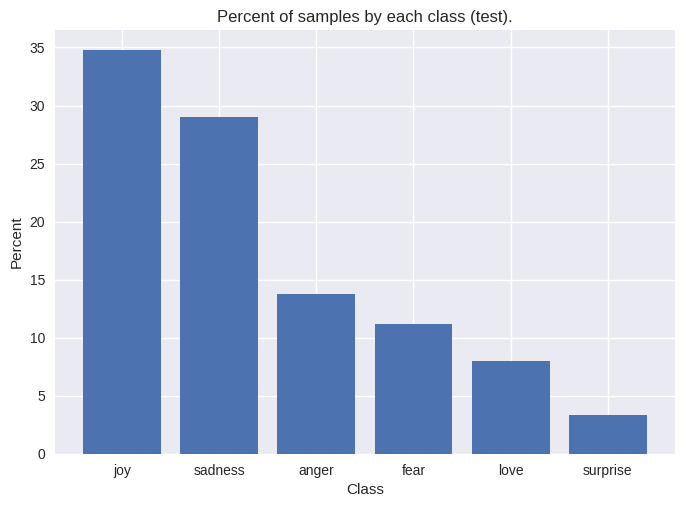

In [ ]:
labels, value_counts = np.unique(test_labels, return_counts=True)
value_percent = [round(value/np.sum(value_counts), 4)*100 for value in value_counts]

df = pd.DataFrame({
    "label": labels,
    "count": value_counts,
    "percent": value_percent
}).sort_values('percent', ascending=False)

plt.xlabel("Class")
plt.ylabel("Percent")
plt.title("Percent of samples by each class (test).")
plt.bar(df['label'], df['percent'])
plt.show()

In [ ]:
df

,label,count,percent
2,joy,695,34.75
4,sadness,581,29.05
0,anger,275,13.75
1,fear,224,11.20
3,love,159,7.95
5,surprise,66,3.30


По графикам выше видно, что датасет по классам не сбалансирован.Больше всего предложений относятся к классам *joy* и *sadness*, меньше всего - к *surprise*. Также заметно, что рпспределение классов на *train* и *test* почти одинаковое.

In [ ]:
import string
punctuation = string.punctuation

punct_counter = 0
upper_counter = 0
for text in train_texts + test_texts:
    for c in text:
        if c in punctuation:
            punct_counter += 1
        if c.isupper():
            upper_counter += 1

print("Amount of punctuation symbols =", punct_counter)
print("Amount of uppercase symbols = ", upper_counter)

Amount of punctuation symbols = 0
Amount of uppercase symbols =  0


Из быстрого взгляда на датасет складывалось ощущение, что там нет символов пунктуации и нет заглавных букв. Оказалось, что это действительно так.

Также интересно посмотреть, есть ли предложения с не буквенными символами.

In [ ]:
not_alpha_counter = 0
for text in train_texts + test_texts:
    text_wo_space = text.replace(" ", "")
    if not text_wo_space.isalpha():
        not_alpha_counter += 1

print("Amount of not alphabet sentences =", not_alpha_counter)

Amount of not alphabet sentences = 0


Все предложения содержат только пробелы и буквенные символы.

In [ ]:
words_amount = {}
for text in train_texts:
    splitted_text = text.split(" ")
    for word in splitted_text:
        words_amount[word] = words_amount.get(word, 0) + 1

words_amount_list = [(word, amount) for word, amount in words_amount.items()]
df = pd.DataFrame({
    "word": [val[0] for val in words_amount_list],
    "amount": [val[1] for val in words_amount_list]
}).sort_values('amount', ascending=False)
df.head(20)

,word,amount
0,i,25859
2,feel,11183
19,and,9589
10,to,8972
33,the,8370
24,a,6200
7,feeling,5112
37,that,5112
100,of,4990
177,my,4283


Часто используемые слова в датасете это стоп-слова. По сути в них нет смысла в нашей задаче, поэтому их можно удалить из рассмотрения. Сделаем это и опять посчитаем статистику.

In [7]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Заметили, что стоп-слова содержат символы не буквенные символы, а в нашем датасете они отсутсвуют. Обновим стоп-слова, удалив ненужные символы.

In [8]:
new_stop_words = set()

for word in stop_words:
    new_word = ""
    for c in word:
        if c.isalpha():
            new_word += c
    new_stop_words.add(new_word)

stop_words = stop_words.union(new_stop_words)

In [40]:
words_amount = {}
for text in train_texts:
    splitted_text = text.split(" ")
    for word in splitted_text:
        if word not in stop_words:
            words_amount[word] = words_amount.get(word, 0) + 1

words_amount_list = [(word, amount) for word, amount in words_amount.items()]
df = pd.DataFrame({
    "word": [val[0] for val in words_amount_list],
    "amount": [val[1] for val in words_amount_list]
}).sort_values('amount', ascending=False)
df.head(30)

,word,amount
0,feel,11183
3,feeling,5112
39,like,2908
11,im,2430
97,really,942
20,know,853
70,time,794
194,get,740
25,little,736
171,people,654


Добавим в стоп-слова ещё несколько слов, такие как im и ive, которые не несут в себе особого смысла.

In [9]:
stop_words = stop_words.union(set(["im", "ive"]))

В списке часто используемых слов много глаголов, наречий и некоторых существительных, которые могут использоваться в разных ситуациях, классах. Исключение, наверное, только слово *love*. Из этого списка слов мало можно сделать каких-то выводов. Больше информации принесет рассмотрение часто исплоьзуемых слов по классам.

In [10]:
def get_word_freq(class_name, filter_words=[]):
    words_amount = {}
    for text, label in zip(train_texts, train_labels):
        if label != class_name:
            continue
        splitted_text = text.split(" ")
        for word in splitted_text:
            if word in filter_words:
                continue
            if word not in stop_words:
                words_amount[word] = words_amount.get(word, 0) + 1

    words_amount_list = [(word, amount) for word, amount in words_amount.items()]
    df = pd.DataFrame({
        "word": [val[0] for val in words_amount_list],
        "amount": [val[1] for val in words_amount_list]
    }).sort_values('amount', ascending=False)

    return df

In [11]:
labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']
for label in labels:
    df = get_word_freq(class_name=label)
    top_words = df.iloc[:30]['word'].tolist()
    print(label, top_words)

joy ['feel', 'feeling', 'like', 'really', 'time', 'get', 'know', 'make', 'would', 'people', 'want', 'think', 'good', 'something', 'love', 'one', 'little', 'pretty', 'life', 'going', 'much', 'even', 'day', 'still', 'well', 'could', 'happy', 'things', 'need', 'way']
sadness ['feel', 'feeling', 'like', 'really', 'know', 'get', 'would', 'still', 'time', 'little', 'even', 'want', 'life', 'people', 'think', 'one', 'bit', 'things', 'much', 'something', 'make', 'day', 'way', 'going', 'back', 'pretty', 'love', 'could', 'right', 'cant']
anger ['feel', 'feeling', 'like', 'really', 'get', 'time', 'know', 'little', 'people', 'want', 'even', 'would', 'angry', 'way', 'think', 'things', 'one', 'could', 'bit', 'still', 'irritable', 'cold', 'life', 'something', 'cant', 'back', 'greedy', 'offended', 'going', 'bothered']
fear ['feel', 'feeling', 'like', 'little', 'bit', 'know', 'really', 'people', 'want', 'still', 'time', 'strange', 'get', 'think', 'nervous', 'terrified', 'going', 'anxious', 'would', 'afr

Для разных классов некоторые часто встречающиеся слова одинаковы: feel, feeling, really и так далее. Составим список общих часто встречающихся слов для дальнейшей их обработки.

In [12]:
freq_words = []
for label in labels:
    df = get_word_freq(class_name=label)
    top_words = df.iloc[:50]['word'].tolist()
    freq_words.append(set(top_words))

freq_words_union = set().union(*freq_words)
for i in range(len(labels)):
    freq_words_union = freq_words_union.intersection(freq_words[i])

freq_words_intersection = list(freq_words_union)
print(freq_words_intersection)

['like', 'think', 'really', 'way', 'time', 'know', 'little', 'feeling', 'people', 'would', 'something', 'life', 'want', 'could', 'get', 'one', 'even', 'feel', 'still']


In [13]:
len(freq_words_intersection)

19

Всего 19 общих часто встречающихся слов из топ-50

<BarContainer object of 15 artists>

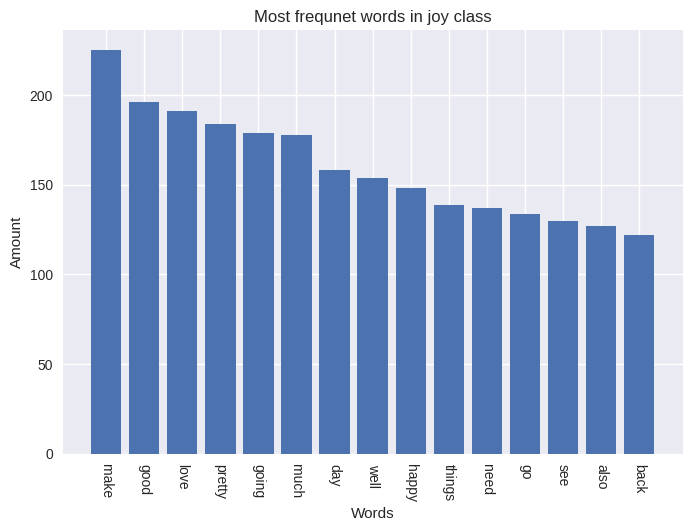

In [ ]:
class_idx = 0
df = get_word_freq(class_name=labels[class_idx], filter_words=freq_words_intersection)
plt.xlabel('Words')
plt.ylabel('Amount')
plt.xticks(rotation=-90)
plt.title(f"Most frequnet words in {labels[class_idx]} class")
plt.bar(df.iloc[:15]['word'], df.iloc[:15]['amount'])

<BarContainer object of 15 artists>

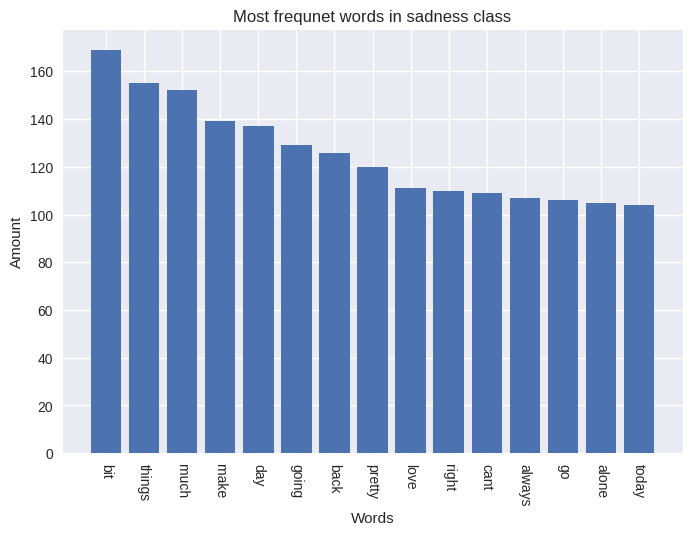

In [ ]:
class_idx = 1
df = get_word_freq(class_name=labels[class_idx], filter_words=freq_words_intersection)
plt.xlabel('Words')
plt.ylabel('Amount')
plt.xticks(rotation=-90)
plt.title(f"Most frequnet words in {labels[class_idx]} class")
plt.bar(df.iloc[:15]['word'], df.iloc[:15]['amount'])

<BarContainer object of 15 artists>

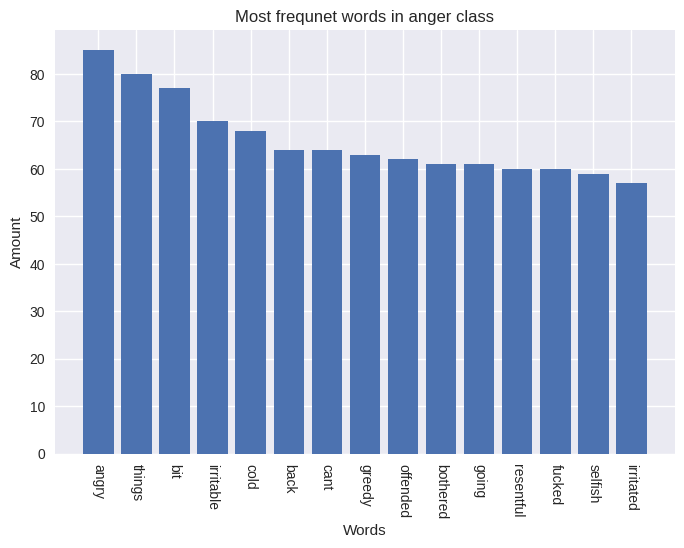

In [ ]:
class_idx = 2
df = get_word_freq(class_name=labels[class_idx], filter_words=freq_words_intersection)
plt.xlabel('Words')
plt.ylabel('Amount')
plt.xticks(rotation=-90)
plt.title(f"Most frequnet words in {labels[class_idx]} class")
plt.bar(df.iloc[:15]['word'], df.iloc[:15]['amount'])

<BarContainer object of 15 artists>

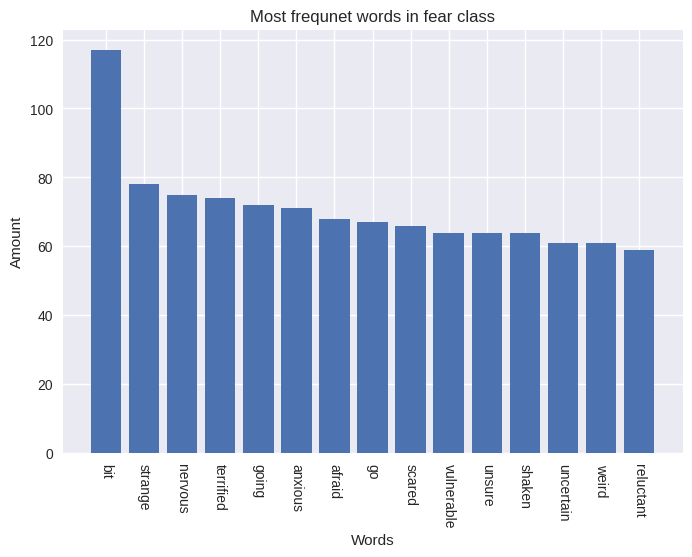

In [ ]:
class_idx = 3
df = get_word_freq(class_name=labels[class_idx], filter_words=freq_words_intersection)
plt.xlabel('Words')
plt.ylabel('Amount')
plt.xticks(rotation=-90)
plt.title(f"Most frequnet words in {labels[class_idx]} class")
plt.bar(df.iloc[:15]['word'], df.iloc[:15]['amount'])

<BarContainer object of 15 artists>

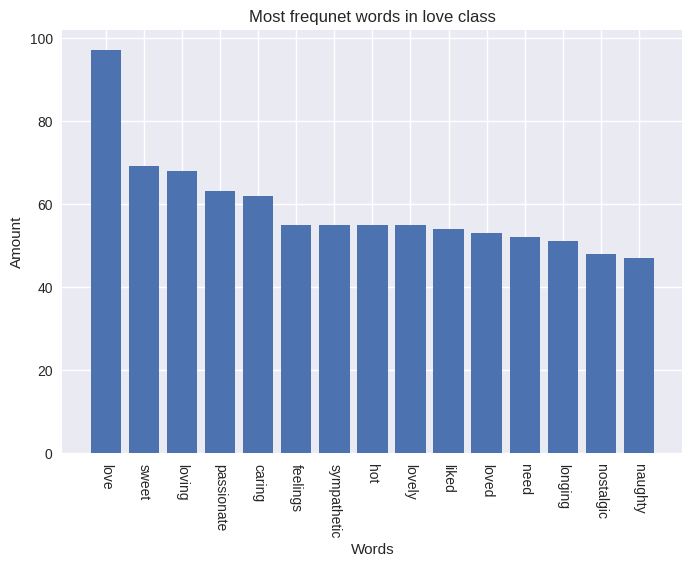

In [ ]:
class_idx = 4
df = get_word_freq(class_name=labels[class_idx], filter_words=freq_words_intersection)
plt.xlabel('Words')
plt.ylabel('Amount')
plt.xticks(rotation=-90)
plt.title(f"Most frequnet words in {labels[class_idx]} class")
plt.bar(df.iloc[:15]['word'], df.iloc[:15]['amount'])

<BarContainer object of 15 artists>

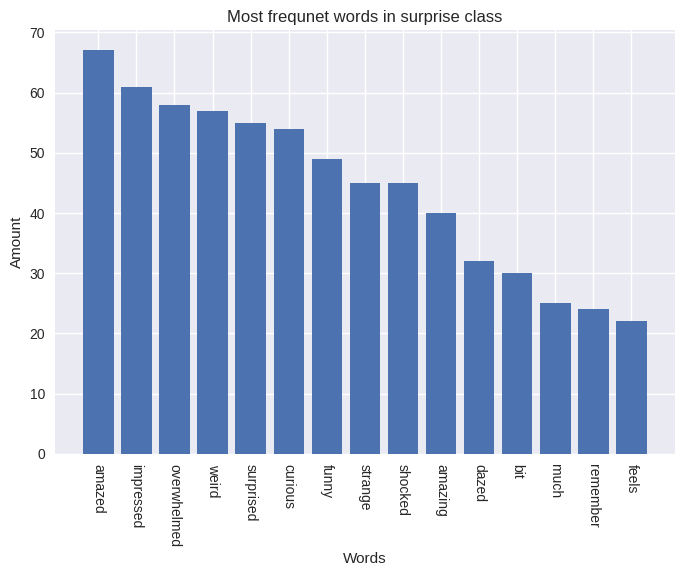

In [ ]:
class_idx = 5
df = get_word_freq(class_name=labels[class_idx], filter_words=freq_words_intersection)
plt.xlabel('Words')
plt.ylabel('Amount')
plt.xticks(rotation=-90)
plt.title(f"Most frequnet words in {labels[class_idx]} class")
plt.bar(df.iloc[:15]['word'], df.iloc[:15]['amount'])

По графикам часто встречающихся слов после фильтрации уже видны слова, которые подходят под конкретныз класс. Так, например, для класса joy мы видим часто употребляются слова well, pretty, good, happy; для класса fear - terrified, nervous и так далее.

In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Функция для обработки датасета
def process_dataset(texts, stop_words, freq_words_intersection, only_test_words=None, lemmatization=True):
    processed_texts = []

    for text in texts:
        splitted_text = text.split(" ")
        processed_text = []
        for word in splitted_text:
            if word in stop_words or word in freq_words_intersection:
                continue

            if only_test_words is not None and word in only_test_words:
                continue

            processed_text.append(lemmatizer.lemmatize(word) if lemmatization else word)

        processed_texts.append(" ".join(processed_text))

    return processed_texts


def get_vocabulary(texts):
    words = set()

    for text in texts:
        splitted_text = text.split(" ")
        for word in splitted_text:
            words.add(word)

    return list(words)


Сформируем список слов, которые есть в test, но нет в train.

In [15]:
train_voc = get_vocabulary(train_texts)
test_voc = get_vocabulary(test_texts)
only_test_words = []
for word in test_voc:
    if word not in train_voc:
        only_test_words.append(word)

# Embeddings

Сделаем функции преобразования текста в embeddings и запустим преобразования датасета для разных методов.

In [16]:
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
# Обработка датасета
train_processed = process_dataset(train_texts, stop_words, freq_words_intersection, only_test_words)
test_processed = process_dataset(test_texts, stop_words, freq_words_intersection, only_test_words)

train_processed_list = [sentence.split(" ") for sentence in train_processed]
test_processed_list = [sentence.split(" ") for sentence in test_processed]

In [18]:
def count_vectorize(processed_train_texts, processed_test_texts):
    count_vec = CountVectorizer(max_features=3000)
    count_vec_train = count_vec.fit_transform(processed_train_texts).toarray()
    count_vec_test = count_vec.transform(processed_test_texts).toarray()
    return count_vec_train, count_vec_test

In [19]:
count_vec_train, count_vec_test = count_vectorize(train_processed, test_processed)

In [20]:
def tf_idf_vectorize(processed_train_texts, processed_test_texts):
    td_idf_vec = TfidfVectorizer(max_features=3000)
    td_idf_train = td_idf_vec.fit_transform(processed_train_texts).toarray()
    td_idf_test = td_idf_vec.transform(processed_test_texts).toarray()
    return td_idf_train, td_idf_test

In [21]:
tf_idf_train, tf_idf_test = tf_idf_vectorize(train_processed, test_processed)

In [22]:
def w2v_vectorize(processed_train_texts, processed_test_texts):
    w2v = gensim.models.Word2Vec(processed_train_texts, min_count=1,
                                vector_size=200, window=5, epochs=100).wv

    w2v_train = []
    for sentence in processed_train_texts:
        w2v_sentence = [w2v[word] for word in sentence]
        w2v_train.append(w2v_sentence)

    for i in range(len(w2v_train)):
        w2v_train[i] = np.mean(w2v_train[i], axis=0)

    w2v_test = []
    for sentence in processed_test_texts:
        w2v_sentence = [w2v[word] for word in sentence]
        w2v_test.append(w2v_sentence)

    for i in range(len(w2v_test)):
        w2v_test[i] = np.mean(w2v_test[i], axis=0)

    return w2v_train, w2v_test

In [23]:
w2v_train, w2v_test = w2v_vectorize(train_processed_list, test_processed_list)

In [24]:
def fasttext_vectorize(processed_train_texts, processed_test_texts):
    fasttext = gensim.models.FastText(processed_train_texts, min_count=1,
                                vector_size=200, window=5, epochs=100).wv

    fasttext_train = []
    for sentence in processed_train_texts:
        fasttext_sentence = [fasttext[word] for word in sentence]
        fasttext_train.append(fasttext_sentence)

    for i in range(len(fasttext_train)):
        fasttext_train[i] = np.mean(fasttext_train[i], axis=0)

    fasttext_test = []
    for sentence in processed_test_texts:
        fasttext_sentence = [fasttext[word] for word in sentence]
        fasttext_test.append(fasttext_sentence)

    for i in range(len(fasttext_test)):
        fasttext_test[i] = np.mean(fasttext_test[i], axis=0)

    return fasttext_train, fasttext_test

In [25]:
fasttext_train, fasttext_test = fasttext_vectorize(train_processed_list, test_processed_list)

# ML algo

Возьмем две модели: KNN и RandomForest. Натренируем их на разных версия вложений и сравним метрики. За метрику возьмем f1_weighted, которая учитываем дисбаланс классов.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [114]:
def get_best_model_predictions(model, params, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(model, params, verbose=4, scoring="f1_weighted")
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    return y_pred

In [34]:
embeddings_datasets = [
    (w2v_train, w2v_test),
    (fasttext_train, fasttext_test),
    (count_vec_train, count_vec_test),
    (tf_idf_train, tf_idf_test)
]

In [33]:
label_name2id = {
    "joy": 0,
    "sadness": 1,
    "anger": 2,
    "fear": 3,
    "love": 4,
    "surprise": 5
}

# Преобразовали train и test labels из строк в числа
train_labels_idx = [label_name2id[name] for name in train_labels]
test_labels_idx = [label_name2id[name] for name in test_labels]

Тренировка и предсказания KNN.

In [ ]:
knn = KNeighborsClassifier()
params = {
    "n_neighbors": [3, 5, 7, 15, 31, 51, 101],
    "weights": ["uniform", "distance"]
}
knn_results = []

for X_train, X_test in embeddings_datasets:
    y_pred = get_best_model_predictions(knn, params, X_train, X_test, train_labels_idx, test_labels_idx)
    f1_res = f1_score(y_pred, test_labels_idx, average="weighted")
    cm = confusion_matrix(y_pred, test_labels_idx)
    print(f1_res)
    knn_results.append((f1_res, cm))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.434 total time=   1.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.441 total time=   1.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.433 total time=   0.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.442 total time=   0.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.438 total time=   0.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.438 total time=   0.8s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.440 total time=   0.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.437 total time=   0.8s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.440 total time=   0.8s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.442 total time=   1.2s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.452 total time=   1.5s
[CV 2/5] END ....n_neighbors=5, weights=uniform;

Тренировка и предсказания Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {
    "n_estimators": [50, 100],
    "max_depth": [20, 40, 80]
}
rfc_results = []

for X_train, X_test in embeddings_datasets:
    y_pred = get_best_model_predictions(rfc, params, X_train, X_test, train_labels_idx, test_labels_idx)
    f1_res = f1_score(y_pred, test_labels_idx, average="weighted")
    cm = confusion_matrix(y_pred, test_labels_idx)
    print(f1_res)
    rfc_results.append((f1_res, cm))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....max_depth=20, n_estimators=50;, score=0.454 total time=  13.9s
[CV 2/5] END .....max_depth=20, n_estimators=50;, score=0.452 total time=  14.1s
[CV 3/5] END .....max_depth=20, n_estimators=50;, score=0.451 total time=  14.1s
[CV 4/5] END .....max_depth=20, n_estimators=50;, score=0.449 total time=  13.9s
[CV 5/5] END .....max_depth=20, n_estimators=50;, score=0.461 total time=  14.2s
[CV 1/5] END ....max_depth=20, n_estimators=100;, score=0.459 total time=  28.3s
[CV 2/5] END ....max_depth=20, n_estimators=100;, score=0.453 total time=  28.5s
[CV 3/5] END ....max_depth=20, n_estimators=100;, score=0.453 total time=  28.3s
[CV 4/5] END ....max_depth=20, n_estimators=100;, score=0.449 total time=  28.3s
[CV 5/5] END ....max_depth=20, n_estimators=100;, score=0.459 total time=  28.4s
[CV 1/5] END .....max_depth=40, n_estimators=50;, score=0.449 total time=  15.0s
[CV 2/5] END .....max_depth=40, n_estimators=50;,

In [ ]:
pd.DataFrame({
    "word2vec": [rfc_results[0][0], knn_results[0][0]],
    "fasttext": [rfc_results[1][0], knn_results[1][0]],
    "count_vectorizer": [rfc_results[2][0], knn_results[2][0]],
    "tf-idf": [rfc_results[3][0], knn_results[3][0]]
}, index=["Random Forest", "KNN"])

,word2vec,fasttext,count_vectorizer,tf-idf
Random Forest,0.619556,0.593464,0.844047,0.824701
KNN,0.538137,0.516588,0.785474,0.842101


По выбранной метрике Random Forest выдает лучше результаты на word2vec, fasttext и count_vectorizer. KNN лучше на tf-idf.

## Neural Networks

In [28]:
import numpy as np
import random
import torch


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Если используется GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Подготовка датасета

In [31]:
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split

def create_data_loader(train_embeddings, train_labels, test_embeddings, test_labels, val_split=0.1, batch_size=32):
    train_embeddings = torch.tensor(train_embeddings, dtype=torch.float32).to(device)
    test_embeddings = torch.tensor(test_embeddings, dtype=torch.float32).to(device)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    test_labels = torch.tensor(test_labels, dtype=torch.long)
    # dataset = TextEmbeddingDataset(train_embeddings, train_labels)
    dataset = TensorDataset(train_embeddings, train_labels)
    # test_dataset = TextEmbeddingDataset(test_embeddings, test_labels)
    test_dataset = TensorDataset(test_embeddings, test_labels)

    # Разделение на тренировочный и валидационный наборы
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


In [66]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [55]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


def train_model(model, train_loader, val_loader, test_loader, criterion, optimizer, embedding_name, i, num_epochs=10):
    train_losses = []
    val_losses = []
    test_metrics = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        avg_val_loss = validate_model(model, val_loader, criterion)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

        test_metrics.append(evaluate_model(model, test_loader))

    # После обучения строим графики
    plot_learning_curve(train_losses, val_losses, test_metrics, embedding_name, subplot_index=i + 1)
    return test_metrics[-1]

def validate_model(model, val_loader, criterion):
    model.eval()  # Установить режим оценки
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss

def plot_learning_curve(train_losses, val_losses, test_metrics, embedding_name, subplot_index):
    epochs = range(1, len(train_losses) + 1)

    plt.subplot(2, 2, subplot_index)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.plot(epochs, test_metrics, label='F1-score test')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Learning Curve {embedding_name}')
    plt.legend()

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f'Weighted F1 Score: {f1:.4f}')
    return f1

In [ ]:
# embeddings_datasets = [
#     (w2v_train, w2v_test),
#     (fasttext_train, fasttext_test),
#     (count_vec_train, count_vec_test),
#     (tf_idf_train, tf_idf_test)
# ]

In [51]:
embeddings_mapping = {
    0: "Word2Vec",
    1: "FastText",
    2: "CountVectorizer",
    3: "TF-IDF",
}

In [78]:
def nn_pipeline(model_class, embeddings_datasets, train_labels, test_labels, model_name, criterion=nn.CrossEntropyLoss(), num_epochs=10):
    num_classes = 6
    scores = []
    # model = FeedForwardNN(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device)
    for i, embeddings in enumerate(embeddings_datasets):
        input_size = np.array(embeddings[0]).shape[1]

        train_loader, val_loader, test_loader = create_data_loader(embeddings[0], train_labels, embeddings[1], test_labels, val_split=0.1, batch_size=32)

        if model_class == FeedForwardNN:
            hidden_size = 128
            model = FeedForwardNN(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device)
        elif model_class == FeedForwardNN2:
            hidden_size = 128
            hidden_size2 = 64
            model = FeedForwardNN2(input_size=input_size, hidden_size=hidden_size, hidden_size2=hidden_size2, num_classes=num_classes).to(device)
        elif model_class == CNNTextClassifier:
            model = CNNTextClassifier(input_dim=input_size, num_classes=num_classes).to(device)
        elif model_class == CNNTextClassifier2:
            model = CNNTextClassifier2(input_dim=input_size, num_classes=num_classes).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        f1 = train_model(model, train_loader, val_loader, test_loader, criterion=criterion, embedding_name=embeddings_mapping[i], i=i, optimizer=optimizer, num_epochs=num_epochs)
        scores.append(f1)

    plt.tight_layout()
    plt.show()
    return pd.DataFrame({
        "Word2Vec": scores[0],
        "FastText": scores[1],
        "CountVectorizer": scores[2],
        "TF-IDF": scores[3]
    }, index=[model_name])


Epoch [1/5], Train Loss: 1.1633, Val Loss: 1.0007
Weighted F1 Score: 0.5955
Epoch [2/5], Train Loss: 0.8928, Val Loss: 0.8955
Weighted F1 Score: 0.6373
Epoch [3/5], Train Loss: 0.7502, Val Loss: 0.8410
Weighted F1 Score: 0.6599
Epoch [4/5], Train Loss: 0.6375, Val Loss: 0.8242
Weighted F1 Score: 0.6898
Epoch [5/5], Train Loss: 0.5483, Val Loss: 0.8696
Weighted F1 Score: 0.6731
Epoch [1/5], Train Loss: 1.2403, Val Loss: 1.0830
Weighted F1 Score: 0.5625
Epoch [2/5], Train Loss: 1.0077, Val Loss: 0.9832
Weighted F1 Score: 0.6011
Epoch [3/5], Train Loss: 0.8863, Val Loss: 0.9415
Weighted F1 Score: 0.6081
Epoch [4/5], Train Loss: 0.7853, Val Loss: 0.9472
Weighted F1 Score: 0.6242
Epoch [5/5], Train Loss: 0.6990, Val Loss: 0.9620
Weighted F1 Score: 0.6232
Epoch [1/5], Train Loss: 0.8696, Val Loss: 0.3790
Weighted F1 Score: 0.8623
Epoch [2/5], Train Loss: 0.2068, Val Loss: 0.3567
Weighted F1 Score: 0.8873
Epoch [3/5], Train Loss: 0.0948, Val Loss: 0.4082
Weighted F1 Score: 0.8848
Epoch [4/5],

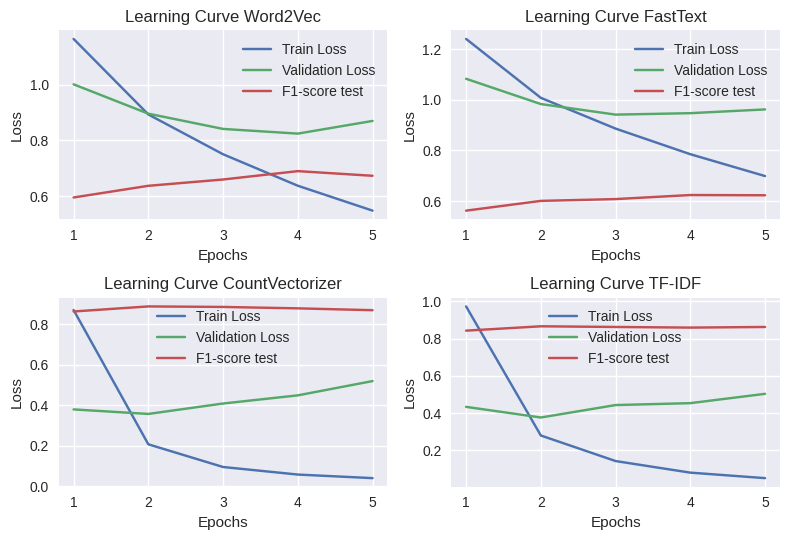

,Word2Vec,FastText,CountVectorizer,TF-IDF
FFNN,0.673143,0.623247,0.868681,0.862928


In [68]:
metrics_per_model_ffn1 = nn_pipeline(
    model_class=FeedForwardNN,
    embeddings_datasets=embeddings_datasets,
    train_labels=train_labels_idx,
    test_labels=test_labels_idx,
    model_name = "FFNN",
    num_epochs=5
)
metrics_per_model_ffn1

На полносвязной сети лучше всего себя показали CountVectorizer и TF-IDF.

График показывает, что за первые несколько эпох модель достигает оптимального значения, дальнейшее обучение не имеет смысла.

### CNN

Так как для корректной работы RNN требуются последовательности, а у нас требование использовать эмбеддинги текстов (count, tfidf), рассмотрим CNN

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNTextClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNNTextClassifier, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5)
        self.pool1 = nn.AdaptiveMaxPool1d(1)

        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.1)
        self.output_layer = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch_size, input_dim] -> [batch_size, 1, input_dim]

        x = F.relu(self.conv1(x))
        x = self.pool1(x).squeeze(2)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

Epoch [1/5], Train Loss: 1.5884, Val Loss: 1.5818
Weighted F1 Score: 0.2574
Epoch [2/5], Train Loss: 1.5789, Val Loss: 1.5685
Weighted F1 Score: 0.2430
Epoch [3/5], Train Loss: 1.5756, Val Loss: 1.5647
Weighted F1 Score: 0.1820
Epoch [4/5], Train Loss: 1.5729, Val Loss: 1.5647
Weighted F1 Score: 0.2414
Epoch [5/5], Train Loss: 1.5707, Val Loss: 1.5595
Weighted F1 Score: 0.2597
Epoch [1/5], Train Loss: 1.5869, Val Loss: 1.5913
Weighted F1 Score: 0.2247
Epoch [2/5], Train Loss: 1.5777, Val Loss: 1.5855
Weighted F1 Score: 0.2549
Epoch [3/5], Train Loss: 1.5749, Val Loss: 1.5887
Weighted F1 Score: 0.2572
Epoch [4/5], Train Loss: 1.5718, Val Loss: 1.5993
Weighted F1 Score: 0.2591
Epoch [5/5], Train Loss: 1.5718, Val Loss: 1.5842
Weighted F1 Score: 0.2496
Epoch [1/5], Train Loss: 1.5889, Val Loss: 1.5729
Weighted F1 Score: 0.1308
Epoch [2/5], Train Loss: 1.5813, Val Loss: 1.5710
Weighted F1 Score: 0.1792
Epoch [3/5], Train Loss: 1.5808, Val Loss: 1.5703
Weighted F1 Score: 0.1792
Epoch [4/5],

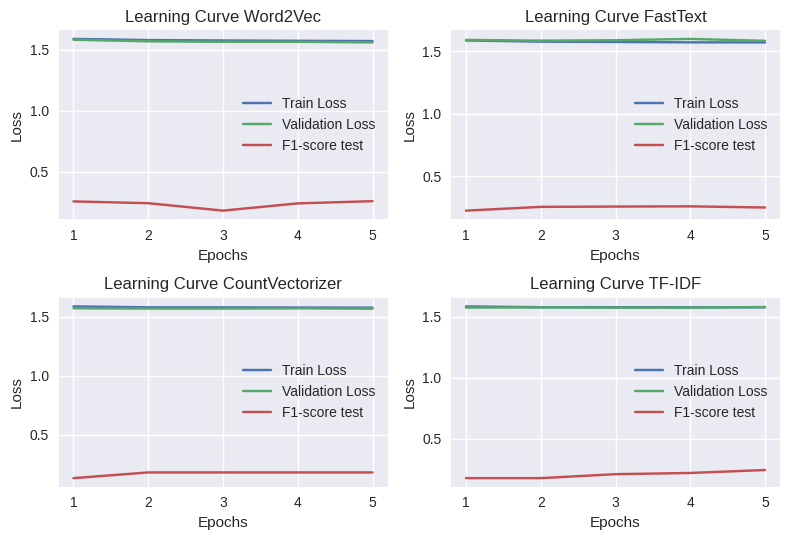

,Word2Vec,FastText,CountVectorizer,TF-IDF
CNN,0.259651,0.249619,0.17923,0.245583


In [76]:
metrics_per_model_cnn = nn_pipeline(
    model_class=CNNTextClassifier,
    embeddings_datasets=embeddings_datasets,
    train_labels=train_labels_idx,
    test_labels=test_labels_idx,
    model_name="CNN",
    num_epochs=5
)
metrics_per_model_cnn


При такой конфигурации на этих данных CNN не обучается от слова совсем

### Улучшение FFN

Добавим еще один скрытый слой, с размерностью hiiden_size/2 (64)

In [74]:
class FeedForwardNN2(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
        super(FeedForwardNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size2)
        self.fc4 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

Epoch [1/5], Train Loss: 1.1894, Val Loss: 1.0957
Weighted F1 Score: 0.5845
Epoch [2/5], Train Loss: 0.9054, Val Loss: 0.9267
Weighted F1 Score: 0.6413
Epoch [3/5], Train Loss: 0.7474, Val Loss: 0.8849
Weighted F1 Score: 0.6693
Epoch [4/5], Train Loss: 0.6281, Val Loss: 0.8933
Weighted F1 Score: 0.6787
Epoch [5/5], Train Loss: 0.5437, Val Loss: 0.9085
Weighted F1 Score: 0.6736
Epoch [1/5], Train Loss: 1.2753, Val Loss: 1.1557
Weighted F1 Score: 0.5488
Epoch [2/5], Train Loss: 1.0363, Val Loss: 1.0523
Weighted F1 Score: 0.5817
Epoch [3/5], Train Loss: 0.8972, Val Loss: 1.0012
Weighted F1 Score: 0.6114
Epoch [4/5], Train Loss: 0.7955, Val Loss: 0.9958
Weighted F1 Score: 0.6251
Epoch [5/5], Train Loss: 0.7059, Val Loss: 1.0464
Weighted F1 Score: 0.6137
Epoch [1/5], Train Loss: 1.0267, Val Loss: 0.5134
Weighted F1 Score: 0.8040
Epoch [2/5], Train Loss: 0.3056, Val Loss: 0.3434
Weighted F1 Score: 0.8820
Epoch [3/5], Train Loss: 0.1294, Val Loss: 0.4097
Weighted F1 Score: 0.8740
Epoch [4/5],

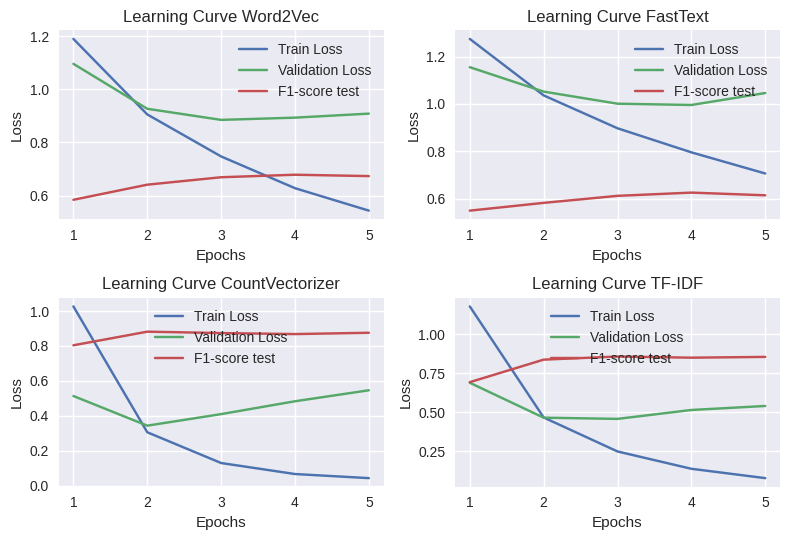

,Word2Vec,FastText,CountVectorizer,TF-IDF
FFNN_upgraded,0.673567,0.613683,0.875762,0.853822


In [75]:
metrics_per_model_ffn2 = nn_pipeline(
    model_class=FeedForwardNN2,
    embeddings_datasets=embeddings_datasets,
    train_labels=train_labels_idx,
    test_labels=test_labels_idx,
    model_name = "FFNN_upgraded",
    num_epochs=5
)
metrics_per_model_ffn2

Ощутимых улучшений это не принесло

### Улучшение СNN

In [77]:
class CNNTextClassifier2(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNNTextClassifier2, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3)
        self.pool3 = nn.AdaptiveMaxPool1d(1)

        self.fc1 = nn.Linear(512, 128)
        self.dropout = nn.Dropout(0.1)
        self.output_layer = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch_size, input_dim] -> [batch_size, 1, input_dim]

        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x).squeeze(2)  # Убираем размерность, чтобы подать в полносвязный слой

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.output_layer(x)

        return x

Epoch [1/5], Train Loss: 1.5875, Val Loss: 1.6020
Weighted F1 Score: 0.1792
Epoch [2/5], Train Loss: 1.5695, Val Loss: 1.5803
Weighted F1 Score: 0.2468
Epoch [3/5], Train Loss: 1.5476, Val Loss: 1.5506
Weighted F1 Score: 0.2831
Epoch [4/5], Train Loss: 1.5067, Val Loss: 1.5335
Weighted F1 Score: 0.3176
Epoch [5/5], Train Loss: 1.4761, Val Loss: 1.5176
Weighted F1 Score: 0.3268
Epoch [1/5], Train Loss: 1.5860, Val Loss: 1.5800
Weighted F1 Score: 0.1835
Epoch [2/5], Train Loss: 1.5765, Val Loss: 1.5736
Weighted F1 Score: 0.2082
Epoch [3/5], Train Loss: 1.5664, Val Loss: 1.5640
Weighted F1 Score: 0.2595
Epoch [4/5], Train Loss: 1.5438, Val Loss: 1.5433
Weighted F1 Score: 0.3168
Epoch [5/5], Train Loss: 1.5078, Val Loss: 1.4989
Weighted F1 Score: 0.3223
Epoch [1/5], Train Loss: 1.5893, Val Loss: 1.5623
Weighted F1 Score: 0.1792
Epoch [2/5], Train Loss: 1.5864, Val Loss: 1.5563
Weighted F1 Score: 0.1792
Epoch [3/5], Train Loss: 1.5815, Val Loss: 1.5568
Weighted F1 Score: 0.1792
Epoch [4/5],

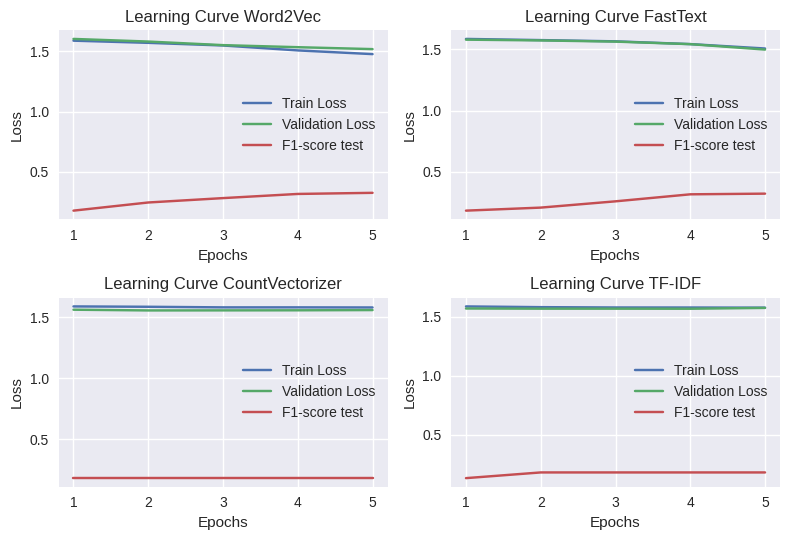

,Word2Vec,FastText,CountVectorizer,TF-IDF
CNN_upgraded,0.326755,0.32225,0.17923,0.17923


In [79]:
metrics_per_model_cnn2 = nn_pipeline(
    model_class=CNNTextClassifier2,
    embeddings_datasets=embeddings_datasets,
    train_labels=train_labels_idx,
    test_labels=test_labels_idx,
    model_name="CNN_upgraded",
    num_epochs=5
)
metrics_per_model_cnn2

Здесь мы видим, что с усложнением CNN модели нейросетевые эмбеддинги Word2vec и FastText немного увеличили метрику, и что самое главное, начал падать лосс, в отличие от статистических эмбеддингов.

Попробуем запустить улучшенную CNN на большем количестве эпох, быть может увидим улучшение

Epoch [1/20], Train Loss: 1.5869, Val Loss: 1.5796
Weighted F1 Score: 0.1840
Epoch [2/20], Train Loss: 1.5749, Val Loss: 1.5677
Weighted F1 Score: 0.2020
Epoch [3/20], Train Loss: 1.5630, Val Loss: 1.6105
Weighted F1 Score: 0.1974
Epoch [4/20], Train Loss: 1.5389, Val Loss: 1.5282
Weighted F1 Score: 0.3101
Epoch [5/20], Train Loss: 1.5004, Val Loss: 1.5413
Weighted F1 Score: 0.3003
Epoch [6/20], Train Loss: 1.4673, Val Loss: 1.5184
Weighted F1 Score: 0.3333
Epoch [7/20], Train Loss: 1.4268, Val Loss: 1.5199
Weighted F1 Score: 0.3273
Epoch [8/20], Train Loss: 1.3804, Val Loss: 1.5238
Weighted F1 Score: 0.3480
Epoch [9/20], Train Loss: 1.3297, Val Loss: 1.5155
Weighted F1 Score: 0.3791
Epoch [10/20], Train Loss: 1.2831, Val Loss: 1.5485
Weighted F1 Score: 0.3840
Epoch [11/20], Train Loss: 1.2197, Val Loss: 1.5862
Weighted F1 Score: 0.3924
Epoch [12/20], Train Loss: 1.1577, Val Loss: 1.6013
Weighted F1 Score: 0.3970
Epoch [13/20], Train Loss: 1.0926, Val Loss: 1.7314
Weighted F1 Score: 0.

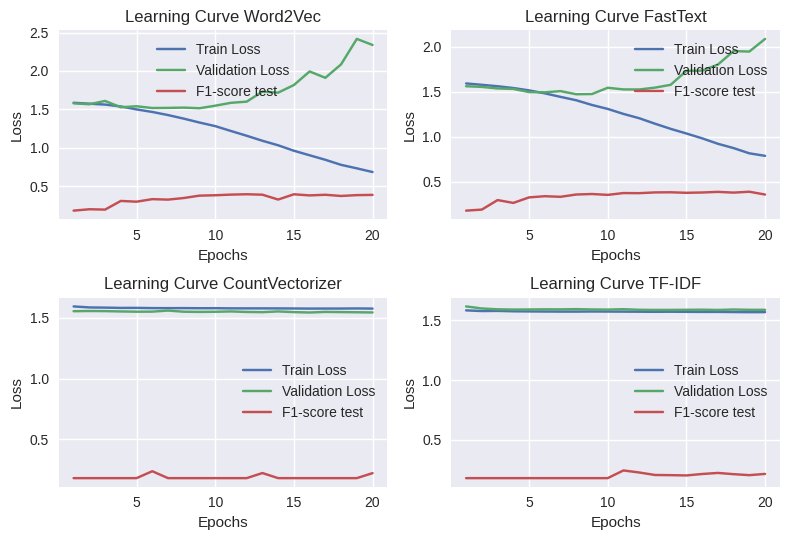

,Word2Vec,FastText,CountVectorizer,TF-IDF
CNN_upgraded,0.388719,0.357855,0.220402,0.214563


In [83]:
metrics_per_model_cnn2_more_epochs = nn_pipeline(
    model_class=CNNTextClassifier2,
    embeddings_datasets=embeddings_datasets,
    train_labels=train_labels_idx,
    test_labels=test_labels_idx,
    model_name="CNN_upgraded",
    num_epochs=20
)
metrics_per_model_cnn2_more_epochs

Прогнав на большем количестве эпох, мы увидели небольшое увеличение метрики на нейросетевых эмбеддингах, а так же точку начала переобучения. Стало лучше, но не сильно. Тем не менее, добавление сверточных слоев улучшило перфоманс.

### Итог по нейросетям

In [84]:
pd.concat([metrics_per_model_ffn1, metrics_per_model_ffn2, metrics_per_model_cnn, metrics_per_model_cnn2_more_epochs])

,Word2Vec,FastText,CountVectorizer,TF-IDF
FFNN,0.673143,0.623247,0.868681,0.862928
FFNN_upgraded,0.673567,0.613683,0.875762,0.853822
CNN,0.259651,0.249619,0.179230,0.245583
CNN_upgraded,0.388719,0.357855,0.220402,0.214563


### Итоги по всем алгоритмам

In [86]:
pd.DataFrame({
    "word2vec": [0.619556, 0.538137, 0.673567, 0.388719],
    "fasttext": [0.593464, 0.516588, 0.613683, 0.357855],
    "count_vectorizer": [0.844047, 0.785474, 0.875762, 0.220402],
    "tf-idf": [0.824701, 0.842101, 0.853822, 0.214563]
}, index=["Random Forest", "KNN", "FFNN", "CNN"])

# 	            word2vec	fasttext	count_vectorizer	tf-idf
# Random Forest	0.619556	0.593464	0.844047	0.824701
# KNN	            0.538137	0.516588	0.785474	0.842101
# FFNN	        0.673143	0.623247	0.868681	0.862928
# FFNN_upgraded	0.673567	0.613683	0.875762	0.853822
# CNN	            0.259651	0.249619	0.179230	0.245583
# CNN_upgraded	0.326755	0.322250	0.179230	0.17923

,word2vec,fasttext,count_vectorizer,tf-idf
Random Forest,0.619556,0.593464,0.844047,0.824701
KNN,0.538137,0.516588,0.785474,0.842101
FFNN,0.673567,0.613683,0.875762,0.853822
CNN,0.388719,0.357855,0.220402,0.214563


## Выводы
- Подводя итоги, самый высокий результат показала полносвязная сеть на count_vectorizer эмбеддингах.

- Если сравнивать классические и нейросетевые методы, то полносвязная сеть показала себя лучше классических моделей, а сверточная сеть хуже классических моделей.

- Эмбеддинги, построенные на статистиках показали в данной задаче себя лучше. Причинами может быть недообученность эмбеддингов из-за малого размера датасета, низкая длина предложения в данных, а также потеря семантики в предложениях ввиду сильной обработки датасета (даже на уровне "сырых" данных)

